--------------------------------------------------
One-Way ANOVA: Bond Lifetime
--------------------------------------------------
F= 5.422222222222224 , PR(>F)= 0.06646291798667313
--------------------------------------------------
Student t-test: L1-GVA Bond Lifetime
--------------------------------------------------
F= 2.1190674984619315 , PR(>F)= 0.1014485502615553
--------------------------------------------------
Student t-test: L1-MART1 Bond Lifetime
--------------------------------------------------
F= 2.1183934429792144 , PR(>F)= 0.10152559857931137
--------------------------------------------------
Student t-test: MART1-GVA Bond Lifetime
--------------------------------------------------
F= -0.01980166645713671 , PR(>F)= 0.9851499632123091
      L1  MART1   GVA
0   4724   4028  4048
1  44054   1358  3304
2  39915   3823  1920


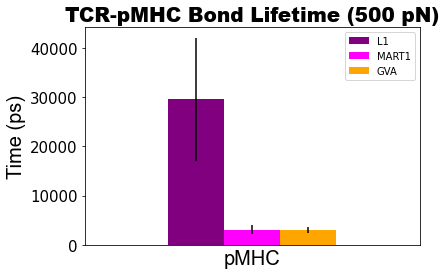

In [6]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from pingouin import pairwise_tukey
from pingouin import pairwise_tukey
from openpyxl import load_workbook

path=r'/Users/zrollins/Documents/Documents/DMF5_MART1/BondLifetime_Stats_NonPara.xlsx'
book = load_workbook(path)
writer=pd.ExcelWriter(path, engine = 'openpyxl')
writer.book=book

M1=[4028,1358,3823]
GVA=[4048,3304,1920]
L1=[4724,44054,39915]


t={'L1 (Mutant)':L1, 'MART1 (WT)':M1,'GVA (Mutant)':GVA}
df = pd.DataFrame(t)
df['MART1'] = df['MART1 (WT)'].astype(float).mean(axis=0)
df['MART1 SEM'] = df['MART1 (WT)'].astype(float).sem(axis=0)
df['L1'] = df['L1 (Mutant)'].astype(float).mean(axis=0)
df['L1 SEM'] = df['L1 (Mutant)'].astype(float).sem(axis=0)
df['GVA'] = df['GVA (Mutant)'].astype(float).mean(axis=0)
df['GVA SEM'] = df['GVA (Mutant)'].astype(float).sem(axis=0)

data=pd.DataFrame()
data['L1']=df['L1 (Mutant)']
data['MART1'] =df['MART1 (WT)']
data['GVA']=df['GVA (Mutant)']

###One-Way ANOVA
f, p = stats.kruskal(data.dropna()['L1'],data.dropna()['MART1'],data.dropna()['GVA'])
print('--------------------------------------------------')
print('One-Way ANOVA: Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)

###Student's t-test
f, p = stats.ttest_ind(data.dropna()['L1'],data.dropna()['GVA'])
print('--------------------------------------------------')
print('Student t-test: L1-GVA Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)
f, p = stats.ttest_ind(data.dropna()['L1'],data.dropna()['MART1'])
print('--------------------------------------------------')
print('Student t-test: L1-MART1 Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)
f, p = stats.ttest_ind(data.dropna()['MART1'],data.dropna()['GVA'])
print('--------------------------------------------------')
print('Student t-test: MART1-GVA Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)

###Posthoc Tukey-Kramer Test
tk=data[['L1','MART1','GVA']].copy()
tk_melt=pd.melt(tk.reset_index(),id_vars=['index'], value_vars=['L1','MART1','GVA'])
tk_melt.columns=['index','Conditions','value']
tk_melt=tk_melt.dropna()
tk_melt=tk_melt.reset_index(drop=True)
m_comp=pairwise_tukey(data=tk_melt, dv='value', between ='Conditions')
#m_comp.to_excel(writer,'BondLifetime_Stats')
#writer.save()

print(data)
y=['L1','MART1','GVA']
color=['purple','magenta','orange']
ax = df.plot.bar(y=y,yerr=df[['L1 SEM','MART1 SEM','GVA SEM']].T.values, color=color, rot=0)
plt.xlim(-0.5,0.5)
plt.xticks(ticks=[], labels= [])
plt.xlabel('pMHC',fontname = 'Arial', fontsize=20)
plt.ylabel('Time (ps)',fontname = 'Arial', fontsize=20)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.title('TCR-pMHC Bond Lifetime (500 pN)',fontname = 'Arial Black', fontsize=20)
plt.savefig('/Users/zrollins/Box/DMF5_MART1/septime.png', bbox_inches='tight',dpi=300)

--------------------------------------------------
One-Way ANOVA: Bond Lifetime
--------------------------------------------------
F= 6.48888888888888 , PR(>F)= 0.0389902195744873
--------------------------------------------------
Student t-test: TCR1-TCR3 Bond Lifetime
--------------------------------------------------
F= -2.606841852323703 , PR(>F)= 0.0596175448718007
--------------------------------------------------
Student t-test: TCR1-TCR2 Bond Lifetime
--------------------------------------------------
F= 2.2660284790132845 , PR(>F)= 0.08610464277268778
--------------------------------------------------
Student t-test: TCR2-TCR3 Bond Lifetime
--------------------------------------------------
F= -3.3157937935168644 , PR(>F)= 0.02949421345778791
   TCR1  TCR2   TCR3
0  2303  1891   5412
1  4135  1754  12295
2  3310  2320   8210


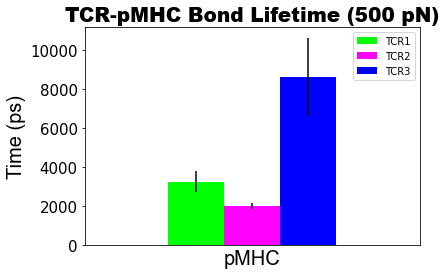

In [9]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from pingouin import pairwise_tukey
from pingouin import pairwise_tukey
from openpyxl import load_workbook

path=r'/Users/zrollins/Documents/Documents/AI_Patent/CEA/CEA/BondLifetime_Stats_Para.xlsx'
book = load_workbook(path)
writer=pd.ExcelWriter(path, engine = 'openpyxl')
writer.book=book

M1=[1891,1754,2320]
GVA=[5412,12295,8210]
L1=[2303,4135,3310]


t={'L1 (Mutant)':L1, 'MART1 (WT)':M1,'GVA (Mutant)':GVA}
df = pd.DataFrame(t)
df['TCR2'] = df['MART1 (WT)'].astype(float).mean(axis=0)
df['MART1 SEM'] = df['MART1 (WT)'].astype(float).sem(axis=0)
df['TCR1'] = df['L1 (Mutant)'].astype(float).mean(axis=0)
df['L1 SEM'] = df['L1 (Mutant)'].astype(float).sem(axis=0)
df['TCR3'] = df['GVA (Mutant)'].astype(float).mean(axis=0)
df['GVA SEM'] = df['GVA (Mutant)'].astype(float).sem(axis=0)

data=pd.DataFrame()
data['TCR1']=df['L1 (Mutant)']
data['TCR2'] =df['MART1 (WT)']
data['TCR3']=df['GVA (Mutant)']

###One-Way ANOVA
f, p = stats.kruskal(data.dropna()['TCR1'],data.dropna()['TCR2'],data.dropna()['TCR3'])
print('--------------------------------------------------')
print('One-Way ANOVA: Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)

###Student's t-test
f, p = stats.ttest_ind(data.dropna()['TCR1'],data.dropna()['TCR3'])
print('--------------------------------------------------')
print('Student t-test: TCR1-TCR3 Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)
f, p = stats.ttest_ind(data.dropna()['TCR1'],data.dropna()['TCR2'])
print('--------------------------------------------------')
print('Student t-test: TCR1-TCR2 Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)
f, p = stats.ttest_ind(data.dropna()['TCR2'],data.dropna()['TCR3'])
print('--------------------------------------------------')
print('Student t-test: TCR2-TCR3 Bond Lifetime')
print('--------------------------------------------------')
print ('F=',f,',', 'PR(>F)=',p)

###Posthoc Tukey-Kramer Test
tk=data[['TCR1','TCR2','TCR3']].copy()
tk_melt=pd.melt(tk.reset_index(),id_vars=['index'], value_vars=['TCR1','TCR2','TCR3'])
tk_melt.columns=['index','Conditions','value']
tk_melt=tk_melt.dropna()
tk_melt=tk_melt.reset_index(drop=True)
m_comp=pairwise_tukey(data=tk_melt, dv='value', between ='Conditions')
m_comp.to_excel(writer,'BondLifetime_Stats')
writer.save()

print(data)
y=['TCR1','TCR2','TCR3']
color=['lime','magenta','blue']
ax = df.plot.bar(y=y,yerr=df[['L1 SEM','MART1 SEM','GVA SEM']].T.values, color=color, rot=0)
plt.xlim(-0.5,0.5)
plt.xticks(ticks=[], labels= [])
plt.xlabel('pMHC',fontname = 'Arial', fontsize=20)
plt.ylabel('Time (ps)',fontname = 'Arial', fontsize=20)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.title('TCR-pMHC Bond Lifetime (500 pN)',fontname = 'Arial Black', fontsize=20)
plt.savefig('/Users/zrollins/Documents/Documents/AI_Patent/CEA/CEA/septime.png', bbox_inches='tight',dpi=300)